In [19]:
# Creating train, validation. and test data
import os
import shutil
import pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")


def make_subset(subset_name, start_index, end_index):
    for category in ["cat", "dog"]:
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


FileExistsError: [Errno 17] File exists: 'cats_vs_dogs_small/train/cat'

In [ ]:
# Training
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=(180, 180), batch_size=32
)
val_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=(180, 180), batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=(180, 180), batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_branch, labels_branch in train_dataset:
    print("data batch shape:", data_branch.shape)
    print("labels batch shape:", labels_branch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


2023-07-20 15:16:02.035833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-07-20 15:16:02.035964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks,
)


Epoch 1/30


2023-07-20 15:16:05.063753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-20 15:16:05.428073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-20 15:16:05.429278: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0143eb7710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-20 15:16:05.429285: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-07-20 15:16:05.439853: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-20 15:16:05.538806: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

63/63 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.4990

2023-07-20 15:16:07.050061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]
2023-07-20 15:16:07.050284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 3s 15ms/step - loss: 0.6974 - accuracy: 0.4990 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5230 - val_loss: 0.6869 - val_accuracy: 0.5780
Epoch 3/30
63/63 [==============================] - 1s 10ms/step - loss: 0.6905 - accuracy: 0.5795 - val_loss: 0.6528 - val_accuracy: 0.6010
Epoch 4/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6557 - accuracy: 0.6485 - val_loss: 0.6490 - val_accuracy: 0.6040
Epoch 5/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6057 - accuracy: 0.6710 - val_loss: 0.5869 - val_accuracy: 0.6690
Epoch 6/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5739 - accuracy: 0.6980 - val_loss: 0.6117 - val_accuracy: 0.6550
Epoch 7/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5408 - accuracy: 0.7165 - val_loss: 0.6344 - val_accuracy: 0.6540
Epoch 8/30
63/63 [===========

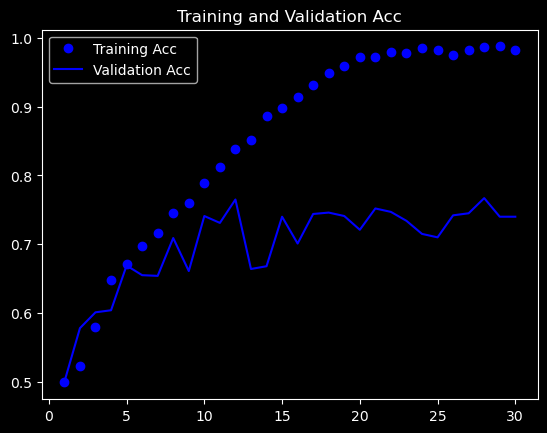

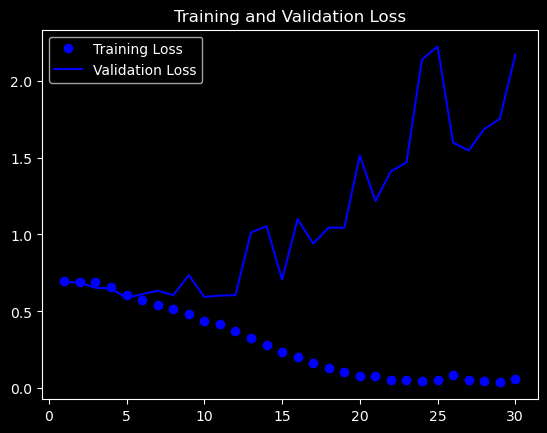

In [20]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Acc")
plt.plot(epochs, val_accuracy, "b", label="Validation Acc")
plt.title("Training and Validation Acc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()
# overfitting


In [23]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.6860
Test accuracy: 0.686


In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)